## K Means Clustering Algorithms Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [4]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

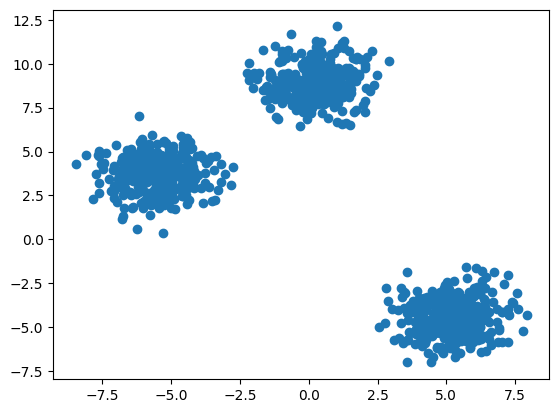

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [9]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Li

In [10]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 991.8899785187884,
 896.7362383816148,
 757.1623824931278,
 667.4456647133584,
 594.1592973139911,
 533.3950702468965]

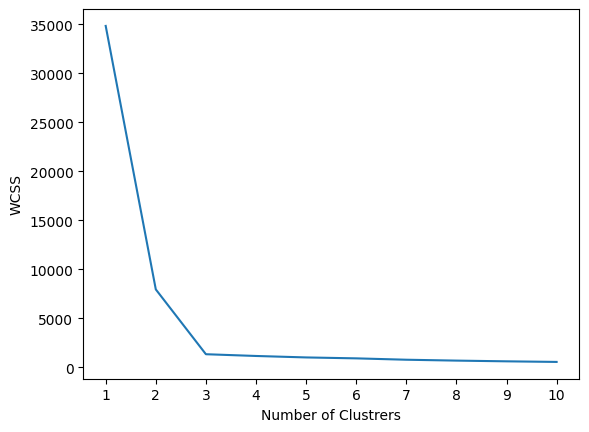

In [11]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [13]:
y_labels=kmeans.fit_predict(X_train)

c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


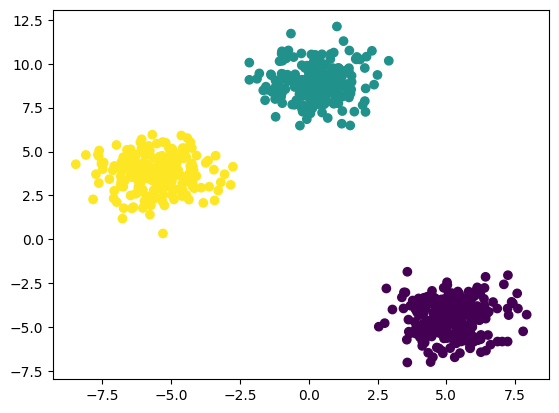

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [15]:
## knee locator
!pip install kneed

In [16]:
from kneed import KneeLocator

In [17]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [18]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [19]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Li

In [20]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.3321994964555899,
 0.34729847490834725,
 0.3422497616813568,
 0.344844063198771,
 0.3433022668770146]

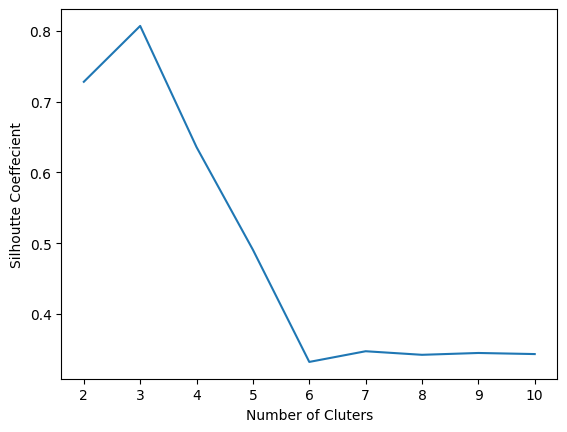

In [21]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()